In [1]:
import os
import shutil
import glob
import subprocess
import time
import itertools
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from tqdm import tqdm

# Création du fichier Excel
%matplotlib inline
import matplotlib
# matplotlib.use("Agg") 
import matplotlib.pyplot as plt
from openpyxl.drawing.image import Image as ExcelImage
from openpyxl.styles import Alignment
import openpyxl

# Couleurs du Terminal
from colorama import Fore, Style, init as colorama_init
colorama_init(autoreset=True)

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score
# ShapeWorks 
import shapeworks as sw

from sklearn.metrics import silhouette_score, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def color_print(msg, color=Fore.CYAN, style=Style.NORMAL):
    """ Print a colored message """
    print(color + style + msg + Style.RESET_ALL)

def acquire_data(dataset_paths, shape_ext, output_path):
    color_print("\n--- Step 1. Acquire Data ---", Fore.GREEN, Style.BRIGHT)
    os.makedirs(output_path, exist_ok=True)

    shape_filenames = []
    dataset_ids = []

    for data_path, dataset_id in dataset_paths:
        files = sorted(glob.glob(os.path.join(data_path, '*' + shape_ext)))
        shape_filenames.extend(files)
        dataset_ids.extend([dataset_id] * len(files))

    color_print(f"  Nombre de shapes : {len(shape_filenames)}", Fore.YELLOW)

    return shape_filenames, dataset_ids

def get_particles(particles_dir, particle_type="world"):
    particles = []
    names = []
    for filename in os.listdir(particles_dir):
        if filename.endswith(particle_type + ".particles"):
            data = np.loadtxt(os.path.join(particles_dir, filename))
            particles.append(data)
            names.append(os.path.splitext(filename)[0])
    if not particles:
        return None, None
    return np.array(particles), names

SHAPE_EXT          = ".nii.gz"
DT_EXT             = ".nrrd"
BASE_OUTPUT_DIR    = os.path.abspath(os.path.join(".", "OUTPUT_PIPELINE"))
OUTPUT_DB = os.path.abspath(os.path.join(".", "OUTPUT_DB"))

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


# LDA

parts_flat_128 shape: 103 samples, 384 features
Training PCA with 103 components
128 Particles ,Best Componante : 100
X_pca_128 shape: 103 samples, 103 features


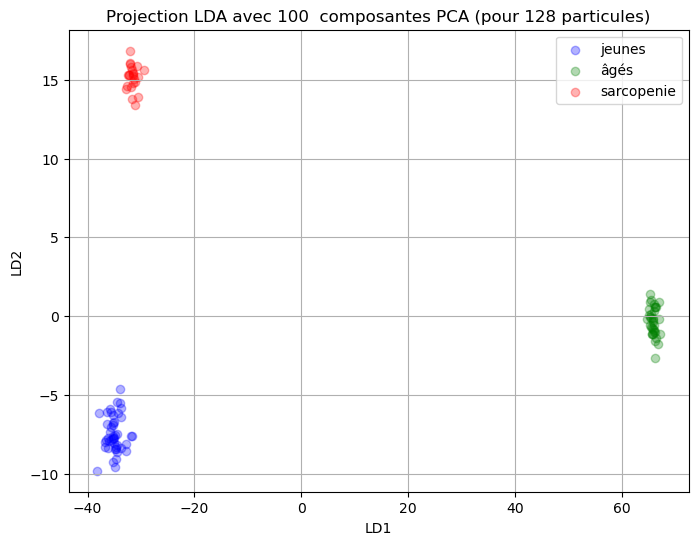

128 Particles avec PCA (100 composantes) -> Accuracy kNN: 0.9405
128 Particles avec PCA -> Accuracy kNN: 0.9405
Composante PCA 88 : importance 5.77%
Composante PCA 75 : importance 4.62%
Composante PCA 82 : importance 4.10%
Composante PCA 99 : importance 3.92%
Composante PCA 78 : importance 3.85%
Composante PCA 100 : importance 3.36%
Composante PCA 98 : importance 2.96%
Composante PCA 94 : importance 2.94%
Composante PCA 70 : importance 2.86%
Composante PCA 83 : importance 2.84%
Composante PCA 69 : importance 2.80%
Composante PCA 89 : importance 2.46%
Composante PCA 80 : importance 2.37%
Composante PCA 58 : importance 2.25%
Composante PCA 73 : importance 2.08%
Composante PCA 76 : importance 1.99%
Composante PCA 57 : importance 1.98%
Composante PCA 68 : importance 1.93%
Composante PCA 62 : importance 1.85%
Composante PCA 74 : importance 1.83%
Composante PCA 86 : importance 1.76%
Composante PCA 65 : importance 1.75%
Composante PCA 91 : importance 1.72%
Composante PCA 55 : importance 1.71%

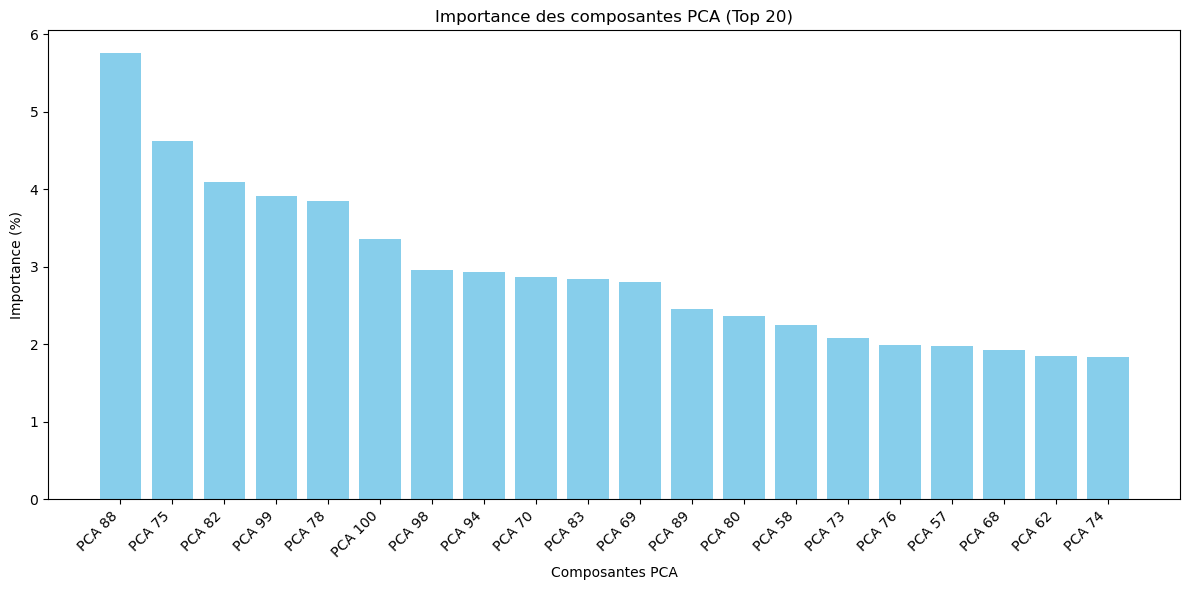

In [52]:
# RF
particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_RF/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_RF/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_RF/Run_1/OUTPUT/Sarcopenie_128"

# TA
# particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/Run_1/OUTPUT/Ages_128"
# particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/Run_1/OUTPUT/Jeunes_128"
# particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/Run_1/OUTPUT/Sarcopenie_128"

# VL
# particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_VL/Run_1/OUTPUT/Ages_128"
# particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_VL/Run_1/OUTPUT/Jeunes_128"
# particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_VL/Run_1/OUTPUT/Sarcopenie_128"


sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)


# Combine data for jeunes and vieux
parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")


# Train PCA on the training data
# Adjust n_components to be less than or equal to min(n_samples, n_features)

max_components = min(parts_flat_128.shape[0], parts_flat_128.shape[1])

scores_128 = []
k_neighbors = 5  # Nombre de voisins pour le kNN
cv_folds = 20  # Nombre de folds pour la validation croisée


print(f"Training PCA with {max_components} components")
component_range = range(2, max_components + 1, 2) 


pca_128 = PCA(n_components=max_components)
X_pca_128 = pca_128.fit_transform(parts_flat_128)


for n in component_range:
    
    # max_components = 100

    # Ensure n_components for LDA is valid

    lda_128 = LDA(n_components=2)
    lda_projection_128 = lda_128.fit_transform(X_pca_128[:, :n], label_128)

    
    # Évaluer avec kNN
    
    score = silhouette_score(lda_projection_128, label_128)
    scores_128.append(score)
    # print(f"128 Particles , PCA={n} -> Accuracy kNN: {score:.4f}")

# Trouver le nombre de composantes optimal
best_n_components_128 = component_range[np.argmax(scores_128)]
best_score = max(scores_128)
print(f"128 Particles ,Best Componante : {best_n_components_128}")

# best_n_components_128 = 100

# Tracer le graphe meilleur nb composante
# plt.figure(figsize=(8, 5))
# plt.plot(component_range, scores_128, marker='o', linestyle='-', color='r', label="Silhouette Score  (128 particules)")
# plt.axvline(best_n_components_128, color='r', linestyle='--', label=f"Best PCA={best_n_components_128}")
# plt.xlabel("Nombre de composantes PCA")
# plt.ylabel("Silhouette Score")
# plt.title("Optimisation des composantes PCA pour LDA avec le silhouette_score")
# plt.legend()
# plt.show()



lda_128 = LDA(n_components=2)
lda_projection_128 = lda_128.fit_transform(X_pca_128[:, :best_n_components_128], label_128)
print(f"X_pca_128 shape: {X_pca_128.shape[0]} samples, {X_pca_128.shape[1]} features")


# Visualiser les résultats LDA en 2D avec des couleurs différentes pour chaque label
plt.figure(figsize=(8, 6))
for label,label_str, color in zip([0, 1, 2], ['jeunes', 'âgés','sarcopenie'], ['blue', 'green', 'red']):
    plt.scatter(lda_projection_128[label_128 == label, 0], lda_projection_128[label_128 == label, 1], 
                c=color, label=f'{label_str}', alpha=0.3, marker='o')

plt.title(f"Projection LDA avec {best_n_components_128}  composantes PCA (pour 128 particules)")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()

# Évaluer avec kNN
score = silhouette_score(lda_projection_128, label_128)
print(f"128 Particles avec PCA ({best_n_components_128} composantes) -> Accuracy kNN: {score:.4f}")


score = silhouette_score(lda_projection_128, label_128)
print(f"128 Particles avec PCA -> Accuracy kNN: {score:.4f}")

# Poids de la direction LDA dans l'espace PCA
lda_weights = lda_128.coef_[0]

# Importance relative des composantes PCA
importance = np.abs(lda_weights) / np.sum(np.abs(lda_weights))

# Affichage trié
sorted_importance = sorted(enumerate(importance), key=lambda x: -x[1])
# Affichage trié
for i, imp in sorted(enumerate(importance), key=lambda x: -x[1]):
    print(f"Composante PCA {i+1} : importance {imp:.2%}")
print(f"somme des importances : {np.sum(importance):.2%}")

# Affichage des composantes importantes sous forme d'histogramme
components = [f"PCA {i+1}" for i, _ in sorted_importance]
values = [imp*100 for _, imp in sorted_importance]

plt.figure(figsize=(12, 6))
plt.bar(components[:20], values[:20], color='skyblue')  # Afficher les 20 premières composantes
plt.xticks(rotation=45, ha='right')
plt.xlabel("Composantes PCA")
plt.ylabel("Importance (%)")
plt.title("Importance des composantes PCA (Top 20)")
plt.tight_layout()
plt.show()


## Visu déformation composante descriminante

Composante PCA la plus discriminante : 88


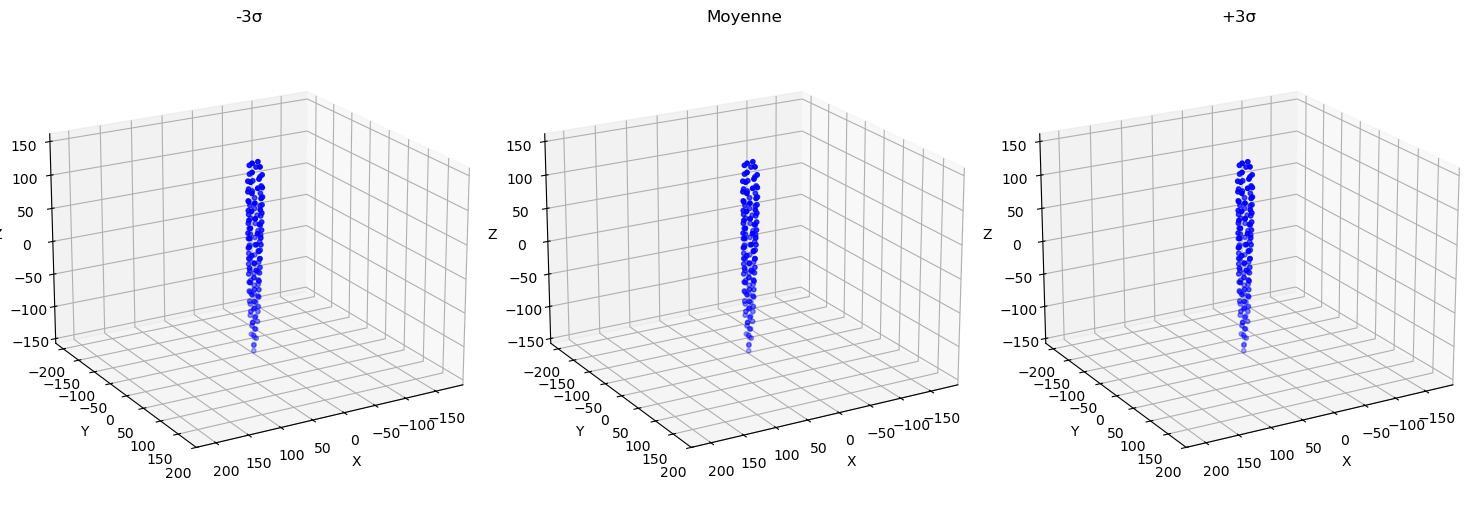

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 2. Trouver la composante PCA la plus importante pour la LDA
lda_weights = lda_128.coef_[0]
most_important_idx = np.argmax(np.abs(lda_weights))
print(f"Composante PCA la plus discriminante : {most_important_idx + 1}")

# 3. Visualiser l'effet de cette composante sur la forme moyenne
mean_shape = pca_128.mean_  # de taille (n_features,)

# Écart-type (sqrt de la variance)
std = np.sqrt(pca_128.explained_variance_[most_important_idx])

# Vecteur propre correspondant
eigenvector = pca_128.components_[most_important_idx]

# Formes reconstruites à ±3σ
shape_minus = mean_shape - 3 * std * eigenvector
shape_plus = mean_shape + 3 * std * eigenvector

# Reshape en nuages de points 3D
n_points = mean_shape.shape[0] // 3
shape_minus_pts = shape_minus.reshape((n_points, 3))
shape_plus_pts = shape_plus.reshape((n_points, 3))
mean_pts = mean_shape.reshape((n_points, 3))

# 4. Visualisation
fig = plt.figure(figsize=(15, 5))

def plot_shape(ax, pts, title):
    ax.scatter(pts[:, 0], pts[:, 1], pts[:, 2], c='b', s=10)
    ax.set_title(title)
    ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
    ax.view_init(elev=20, azim=60)
    ax.axis('equal')

ax1 = fig.add_subplot(131, projection='3d')
plot_shape(ax1, shape_minus_pts, '-3σ')

ax2 = fig.add_subplot(132, projection='3d')
plot_shape(ax2, mean_pts, 'Moyenne')

ax3 = fig.add_subplot(133, projection='3d')
plot_shape(ax3, shape_plus_pts, '+3σ')

plt.tight_layout()
plt.show()


Composante PCA la plus discriminante : 88


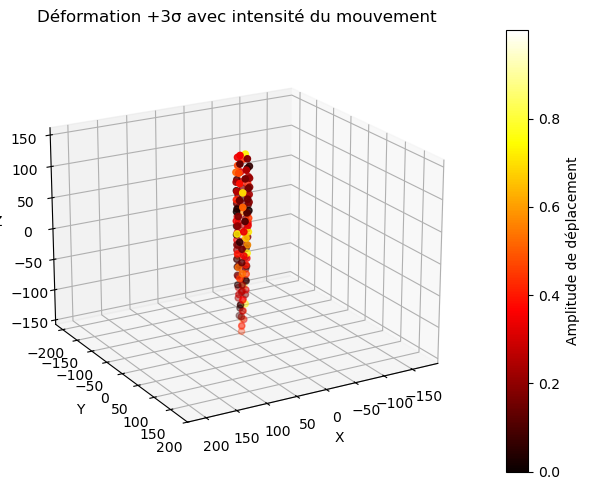

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


# 2. Trouver la composante PCA la plus importante pour la LDA
lda_weights = lda_128.coef_[0]
most_important_idx = np.argmax(np.abs(lda_weights))

print(f"Composante PCA la plus discriminante : {most_important_idx + 1}")

# 3. Reconstruction des formes
mean_shape = pca_128.mean_  # shape (n_features,)
std = np.sqrt(pca_128.explained_variance_[most_important_idx])
eigenvector = pca_128.components_[most_important_idx]

shape_plus = mean_shape + 3 * std * eigenvector
shape_plus_pts = shape_plus.reshape((-1, 3))
mean_pts = mean_shape.reshape((-1, 3))

# 4. Calcul du déplacement par point
displacements = np.linalg.norm(shape_plus_pts - mean_pts, axis=1)
displacements_normalized = (displacements - displacements.min()) / (np.ptp(displacements) + 1e-6)

# 5. Affichage
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(shape_plus_pts[:, 0], shape_plus_pts[:, 1], shape_plus_pts[:, 2],
                     c=displacements_normalized, cmap='hot', s=20)

ax.set_title('Déformation +3σ avec intensité du mouvement')
ax.set_xlabel('X'); ax.set_ylabel('Y'); ax.set_zlabel('Z')
ax.view_init(elev=20, azim=60)
ax.axis('equal')

# Barre de couleur
cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Amplitude de déplacement')

plt.tight_layout()
plt.show()


# Classification sans LDA

In [ ]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_RF/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_RF/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_RF/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
distribution = 20 # nombre d'ensembles de données à générer
for i in range(distribution):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)


    for n in component_range:
        
        # max_components = 100

        # Ensure n_components for LDA is valid

        # Évaluer avec kNN
        # print(f"64 Particles , PCA={n} -> Accuracy kNN: {score:.4f}")
        # X_pca_test_128 = pca_128.transform(X_test_128)
        # score = silhouette_score(X_pca_test_128[:, :n], y_test_128)
        # scores_128.append(score)

        # Train Logistic Regression on 128 particles
        X_pca_test_128 = pca_128.transform(X_test_128)
        log_reg_128 = LogisticRegression(max_iter=10000, random_state=42)
        log_reg_128.fit(X_pca_128[:, :n], y_train_128)

        # Test Logistic Regression on 128 particles
        y_pred_128 = log_reg_128.predict(X_pca_test_128[:, :n])
        score = accuracy_score(y_test_128, y_pred_128)
        scores_128.append(score)
        # print(f"128 Particles , PCA={n} -> Accuracy kNN: {score:.4f}")
    # accuracy_tot.append(scores_128)


    # Trouver le nombre de composantes optimal
    best_n_components_128 = component_range[np.argmax(scores_128)]
    best_score = max(scores_128)
    # print(f"128 Particles ,Best Componante : {best_n_components_128}, score: {best_score:.4f}\n")



    # best_n_components_128=94

    X_pca_test_128 = pca_128.transform(X_test_128)
    
    # Train Logistic Regression on 128 particles
    log_reg_128 = LogisticRegression(max_iter=1000000, random_state=42)
    log_reg_128.fit(X_pca_128[:,:best_n_components_128], y_train_128)

    # Test Logistic Regression on 128 particles
    y_pred_128 = log_reg_128.predict(X_pca_test_128[:, :best_n_components_128])
    accuracy_128 = accuracy_score(y_test_128, y_pred_128)
    accuracy_tot.append(accuracy_128)
    print(f"Logistic Regression Accuracy (128 particles): {accuracy_128:.4f}, meilleur: {best_n_components_128}")
    # print(classification_report(y_test_128, y_pred_128))

print("Classification Report (128 particles):")
print("Précision Moyenne : ", np.mean(accuracy_tot) * 100)
print("Écart Type : ", np.std(accuracy_tot) * 100)

# Visualiser les bonnes et mauvaises prédictions pour 128 particules
plt.figure(figsize=(8, 6))
for label, label_str, color in zip([0, 1, 2], ['jeunes', 'âgés', 'sarcopenie'], ['blue', 'green', 'red']):
    correct = (y_test_128 == y_pred_128) & (y_test_128 == label)
    incorrect = (y_test_128 != y_pred_128) & (y_test_128 == label)
    plt.scatter(X_pca_test_128[:, :best_n_components_128][correct, 0], X_pca_test_128[:, :best_n_components_128][correct, 1], c=color, label=f'{label_str} (correct)', alpha=0.7, marker='o')
    plt.scatter(X_pca_test_128[:, :best_n_components_128][incorrect, 0], X_pca_test_128[:, :best_n_components_128][incorrect, 1], c=color, label=f'{label_str} (incorrect)', alpha=0.7, marker='x')
    plt.scatter(X_pca_128[:,:best_n_components_128][y_train_128 == label, 0], X_pca_128[:,:best_n_components_128][y_train_128 == label, 1], c=color, label=f'{label_str} (train)', alpha=0.3, marker='s')

plt.title(f"Exemple : Régression Logistique sur les données Train et Test , précision : {accuracy_128*100:.1f}%")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()



nb enssemble train : 92, nb ensemble test: 11
X_train_128 shape: 92 samples, 384 features
train nb jeunes : 42, nb vieux : 30, nb sarcopenie : 20
test nb jeunes : 3, nb vieux : 5, nb sarcopenie : 3
128 Particles , PCA=2 -> Accuracy kNN: 0.5455
128 Particles , PCA=4 -> Accuracy kNN: 0.6364
128 Particles , PCA=6 -> Accuracy kNN: 0.6364
128 Particles , PCA=8 -> Accuracy kNN: 0.5455
128 Particles , PCA=10 -> Accuracy kNN: 0.6364
128 Particles , PCA=12 -> Accuracy kNN: 0.6364
128 Particles , PCA=14 -> Accuracy kNN: 0.4545
128 Particles , PCA=16 -> Accuracy kNN: 0.6364
128 Particles , PCA=18 -> Accuracy kNN: 0.4545
128 Particles , PCA=20 -> Accuracy kNN: 0.4545
128 Particles , PCA=22 -> Accuracy kNN: 0.5455
128 Particles , PCA=24 -> Accuracy kNN: 0.4545
128 Particles , PCA=26 -> Accuracy kNN: 0.3636
128 Particles , PCA=28 -> Accuracy kNN: 0.5455
128 Particles , PCA=30 -> Accuracy kNN: 0.5455
128 Particles , PCA=32 -> Accuracy kNN: 0.3636
128 Particles , PCA=34 -> Accuracy kNN: 0.2727
128 Par

KeyboardInterrupt: 

# Classification avec LDA

## Classification (Avec Sarcopénie en entrée)

nb enssemble train : 90, nb ensemble test: 11
X_train_128 shape: 90 samples, 384 features
train nb jeunes : 39, nb vieux : 31, nb sarcopenie : 20
test nb jeunes : 6, nb vieux : 3, nb sarcopenie : 2
Logistic Regression Accuracy (128 particles): 1.0000, meilleur: 70
nb enssemble train : 90, nb ensemble test: 11
X_train_128 shape: 90 samples, 384 features
train nb jeunes : 39, nb vieux : 31, nb sarcopenie : 20
test nb jeunes : 6, nb vieux : 3, nb sarcopenie : 2
Logistic Regression Accuracy (128 particles): 0.9091, meilleur: 16
nb enssemble train : 90, nb ensemble test: 11
X_train_128 shape: 90 samples, 384 features
train nb jeunes : 40, nb vieux : 29, nb sarcopenie : 21
test nb jeunes : 5, nb vieux : 5, nb sarcopenie : 1
Logistic Regression Accuracy (128 particles): 0.7273, meilleur: 8
nb enssemble train : 90, nb ensemble test: 11
X_train_128 shape: 90 samples, 384 features
train nb jeunes : 40, nb vieux : 30, nb sarcopenie : 20
test nb jeunes : 5, nb vieux : 4, nb sarcopenie : 2
Logistic

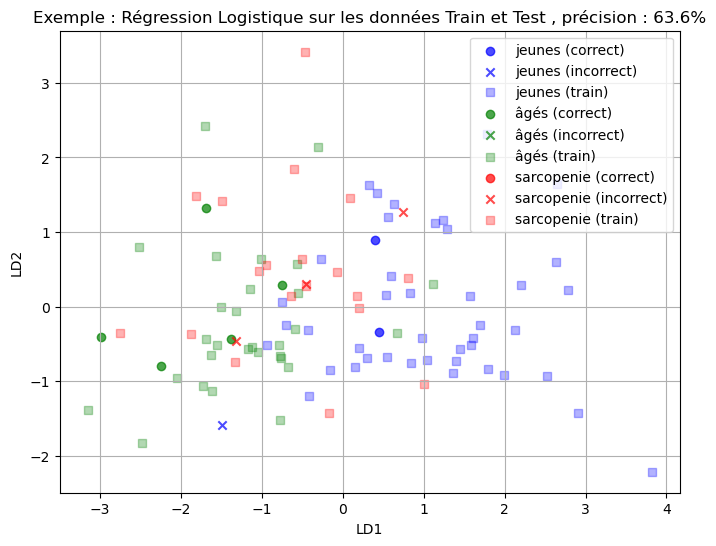

y_true= [1 0 0 1 0 0 2 2 0 1]
y_pred= [1 0 0 1 0 0 2 2 0 1]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88        89
           1       0.78      0.94      0.85        78
           2       0.90      0.51      0.65        53

    accuracy                           0.82       220
   macro avg       0.84      0.79      0.79       220
weighted avg       0.83      0.82      0.81       220



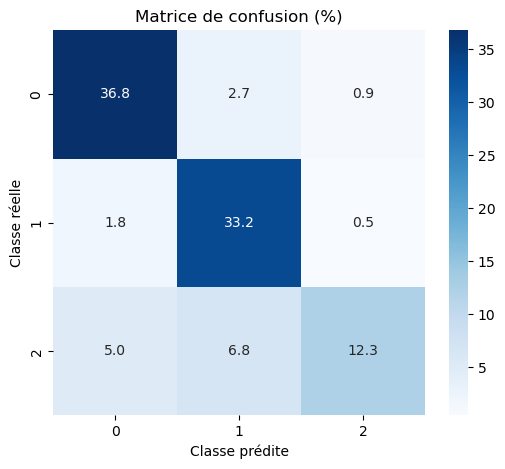

In [8]:
from sklearn.metrics import silhouette_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve, log_loss,auc
from sklearn.preprocessing import label_binarize
import seaborn as sns
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie
y_true = []
y_pred = []
accuracy_tot=[]
for i in range(20):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)


    for n in component_range:
        
        # max_components = 100

        # Ensure n_components for LDA is valid

        lda_128 = LDA(n_components=2)
        lda_projection_128 = lda_128.fit_transform(X_pca_128[:, :n], y_train_128)
        
        # Évaluer avec kNN
        # print(f"64 Particles , PCA={n} -> Accuracy kNN: {score:.4f}")
        # X_pca_test_128 = pca_128.transform(X_test_128)
        # X_lda_test_128 = lda_128.transform(X_pca_test_128[:, :n])
        # score = silhouette_score(X_lda_test_128, y_test_128)
        # scores_128.append(score)

        # Train Logistic Regression on 128 particles
        X_pca_test_128 = pca_128.transform(X_test_128)
        X_lda_test_128 = lda_128.transform(X_pca_test_128[:, :n])
        log_reg_128 = LogisticRegression(max_iter=10000, random_state=42)
        log_reg_128.fit(lda_projection_128, y_train_128)

        # Test Logistic Regression on 128 particles
        y_pred_128 = log_reg_128.predict(X_lda_test_128)
        score = accuracy_score(y_test_128, y_pred_128)
        scores_128.append(score)
        # print(f"128 Particles , PCA={n} -> Accuracy kNN: {score:.4f}")



    # Trouver le nombre de composantes optimal
    best_n_components_128 = component_range[np.argmax(scores_128)]
    best_score = max(scores_128)
    # print(f"128 Particles ,Best Componante : {best_n_components_128}, score: {best_score:.4f}\n")



    # best_n_components_128=94

    lda_128 = LDA(n_components=2)
    lda_projection_128 = lda_128.fit_transform(X_pca_128[:, :best_n_components_128], y_train_128)
    # lda_projection_128 = lda_128.fit_transform(X_train_128, y_train_128)

    X_pca_test_128 = pca_128.transform(X_test_128)
    X_lda_test_128 = lda_128.transform(X_pca_test_128[:, :best_n_components_128])
    # X_lda_test_128 = lda_128.transform(X_test_128)


    # Train Logistic Regression on 128 particles
    log_reg_128 = LogisticRegression(max_iter=10000, random_state=42)
    log_reg_128.fit(lda_projection_128, y_train_128)

    # Test Logistic Regression on 128 particles
    y_pred_128 = log_reg_128.predict(X_lda_test_128)
    accuracy_128 = accuracy_score(y_test_128, y_pred_128)
    accuracy_tot.append(accuracy_128)
    y_true.append(y_test_128)
    y_pred.append(y_pred_128)
    print(f"Logistic Regression Accuracy (128 particles): {accuracy_128:.4f}, meilleur: {best_n_components_128}")
    # print(f"Logistic Regression Accuracy (128 particles): {accuracy_128:.4f}")
    # print(classification_report(y_test_128, y_pred_128))

print("Classification Report (128 particles):")
print("Précision Moyenne : ", np.mean(accuracy_tot) * 100)
print("Écart Type : ", np.std(accuracy_tot) * 100)

# Visualiser les bonnes et mauvaises prédictions pour 128 particules
plt.figure(figsize=(8, 6))
for label, label_str, color in zip([0, 1, 2], ['jeunes', 'âgés', 'sarcopenie'], ['blue', 'green', 'red']):
    correct = (y_test_128 == y_pred_128) & (y_test_128 == label)
    incorrect = (y_test_128 != y_pred_128) & (y_test_128 == label)
    plt.scatter(X_lda_test_128[correct, 0], X_lda_test_128[correct, 1], c=color, label=f'{label_str} (correct)', alpha=0.7, marker='o')
    plt.scatter(X_lda_test_128[incorrect, 0], X_lda_test_128[incorrect, 1], c=color, label=f'{label_str} (incorrect)', alpha=0.7, marker='x')
    plt.scatter(lda_projection_128[y_train_128 == label, 0], lda_projection_128[y_train_128 == label, 1], c=color, label=f'{label_str} (train)', alpha=0.3, marker='s')

plt.title(f"Exemple : Régression Logistique sur les données Train et Test , précision : {accuracy_128*100:.1f}%")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()

y_pred=np.concatenate(y_pred)
y_true=np.concatenate(y_true)
print(f"y_true= {y_true[:10]}")
print(f"y_pred= {y_pred[:10]}")
print(classification_report(y_true, y_pred))
# Conversion en pourcentage par rapport au total
cm = confusion_matrix(y_true, y_pred)
cm_percent = cm.astype('float') / cm.sum() * 100

# Affichage avec seaborn
plt.figure(figsize=(6, 5))
sns.heatmap(cm_percent, annot=True, fmt=".1f", cmap="Blues", xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel("Classe prédite")
plt.ylabel("Classe réelle")
plt.title("Matrice de confusion (%)")
plt.show()



## Classification (sans Sarcopénie en entrée)

In [112]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
for i in range(60):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128[:len(jeunes_parts_flat_128)+len(vieu_parts_flat_128)], label_128[:len(jeunes_parts_flat_128)+len(vieu_parts_flat_128)], test_size=0.1)#, random_state=42)
    
    
    # print(f"nb enssemble train : {len(X_train_64)}, nb ensemble test: {len(X_test_64)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)


    for n in component_range:
        
        # max_components = 100

        # Ensure n_components for LDA is valid

        lda_128 = LDA(n_components=2)
        lda_projection_128 = lda_128.fit_transform(X_pca_128[:, :n], y_train_128)
        
        # Évaluer avec kNN
        # print(f"64 Particles , PCA={n} -> Accuracy kNN: {score:.4f}")
        # X_pca_test_128 = pca_128.transform(X_test_128)
        # X_lda_test_128 = lda_128.transform(X_pca_test_128[:, :n])
        # score = silhouette_score(X_lda_test_128, y_test_128)
        # scores_128.append(score)

        # Train Logistic Regression on 128 particles
        X_pca_test_128 = pca_128.transform(X_test_128)
        X_lda_test_128 = lda_128.transform(X_pca_test_128[:, :n])
        log_reg_128 = LogisticRegression(max_iter=10000, random_state=42)
        log_reg_128.fit(lda_projection_128, y_train_128)

        # Test Logistic Regression on 128 particles
        y_pred_128 = log_reg_128.predict(X_lda_test_128)
        score = accuracy_score(y_test_128, y_pred_128)
        scores_128.append(score)
        # print(f"128 Particles , PCA={n} -> Accuracy kNN: {score:.4f}")



    # Trouver le nombre de composantes optimal
    best_n_components_128 = component_range[np.argmax(scores_128)]
    best_score = max(scores_128)
    # print(f"128 Particles ,Best Componante : {best_n_components_128}, score: {best_score:.4f}\n")



    # best_n_components_128=94

    lda_128 = LDA(n_components=2)
    lda_projection_128 = lda_128.fit_transform(X_pca_128[:, :best_n_components_128], y_train_128)
    # lda_projection_128 = lda_128.fit_transform(X_train_128, y_train_128)

    X_pca_test_128 = pca_128.transform(X_test_128)
    X_lda_test_128 = lda_128.transform(X_pca_test_128[:, :best_n_components_128])
    # X_lda_test_128 = lda_128.transform(X_test_128)


    # Train Logistic Regression on 128 particles
    log_reg_128 = LogisticRegression(max_iter=1000000, random_state=42)
    log_reg_128.fit(lda_projection_128, y_train_128)

    # Test Logistic Regression on 128 particles
    y_pred_128 = log_reg_128.predict(X_lda_test_128)
    accuracy_128 = accuracy_score(y_test_128, y_pred_128)
    accuracy_tot.append(accuracy_128)
    # print(f"Logistic Regression Accuracy (128 particles): {accuracy_128:.4f}")
    # print(classification_report(y_test_128, y_pred_128))

print("Classification Report (128 particles):")
print("Précision Moyenne : ", np.mean(accuracy_tot) * 100)
print("Écart Type : ", np.std(accuracy_tot) * 100)

# Visualiser les bonnes et mauvaises prédictions pour 128 particules
plt.figure(figsize=(8, 6))
for label, label_str, color in zip([0, 1, 2], ['jeunes', 'âgés', 'sarcopenie'], ['blue', 'green', 'red']):
    correct = (y_test_128 == y_pred_128) & (y_test_128 == label)
    incorrect = (y_test_128 != y_pred_128) & (y_test_128 == label)
    plt.scatter(X_lda_test_128[correct, 0], X_lda_test_128[correct, 1], c=color, label=f'{label_str} (correct)', alpha=0.7, marker='o')
    plt.scatter(X_lda_test_128[incorrect, 0], X_lda_test_128[incorrect, 1], c=color, label=f'{label_str} (incorrect)', alpha=0.7, marker='x')
    plt.scatter(lda_projection_128[y_train_128 == label, 0], lda_projection_128[y_train_128 == label, 1], c=color, label=f'{label_str} (train)', alpha=0.3, marker='s')

plt.title(f"Exemple : Régression Logistique sur les données Train et Test , précision : {accuracy_128*100:.1f}%")
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.legend()
plt.grid(True)
plt.show()



ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

# Erreur de reconstruction

## 1- Avec sarcopénie en entrée

→ Faire la PCA sur les sujets sains+sarcopénie train/test de Louise

→ Utiliser métriques généralisation

### Generalisation

In [31]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

def compute_generalization(real_shapes, num_particles):
    print("  Calcul Generalization...", Fore.YELLOW)
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n, p, dim3 = real_shapes.shape
        d = p * dim3
        real_shapes_2d = real_shapes.reshape(n, d)
    else:
        n, d = real_shapes.shape
        real_shapes_2d = real_shapes

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    P = real_shapes_2d.T
    gens = np.zeros(n - 1)

    for m in range(1, n):
        tot_dist = 0.0
        for leave in range(n):
            Y = np.zeros((P.shape[0], n-1))
            Y[:, :leave] = P[:, :leave]
            Y[:, leave:] = P[:, leave+1:]
            mu = np.mean(Y, axis=1, keepdims=True)
            Yc = Y - mu
            U, S, _ = np.linalg.svd(Yc, full_matrices=False)
            epsi = U[:, :m]

            ytest = P[:, leave:leave+1]
            betas = epsi.T @ (ytest - mu)
            rec = epsi @ betas + mu

            dist = shape_distance(rec, ytest, num_particles) / float(num_particles)
            tot_dist += dist
        gens[m - 1] = tot_dist / float(n)

    return gens

particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

# Supression de 23 échantillons aléatoires de jeunes/vieux pour équilibrer les classes
parts_flat_J_V = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
jeunes_vieux_parts_flat_128 = np.delete(parts_flat_J_V, np.random.choice(parts_flat_J_V.shape[0], 23, replace=False), axis=0)

# Combine data for jeunes and vieux
parts_flat_128 = np.vstack((jeunes_vieux_parts_flat_128, sarcopenie_parts_flat_128))
label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
# print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

# Split data into training and testing sets (80% train, 20% test)
# X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)#, random_state=42)
# X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
# X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
# print(f"nb enssemble train : {len(X_train_64)}, nb ensemble test: {len(X_test_64)}")
# print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_train_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_test_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

# Train PCA on the training data
# Adjust n_components to be less than or equal to min(n_samples, n_features)

max_components = min(X_train_128.shape[0], X_train_128.shape[1])
scores_64 = []
scores_128 = []
k_neighbors = 5  # Nombre de voisins pour le kNN
cv_folds = 20  # Nombre de folds pour la validation croisée


# print(f"Training PCA with {max_components} components")
component_range = range(2, max_components + 1, 2) 

pca_128 = PCA(n_components=max_components)
X_pca_128 = pca_128.fit_transform(X_train_128)



# Ensure n_components for LDA is valid
print(len(parts_flat_128))
score=compute_generalization(parts_flat_128, 128)[-1]
print(score)



81
  Calcul Generalization... 
0.5074588420737763


In [117]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

def compute_generalization(train_shapes, test_shapes, num_particles):
    # print("  Calcul Generalization (train/test)...", Fore.YELLOW)

    # Reshape des données d'entraînement
    if len(train_shapes.shape) == 3 and train_shapes.shape[2] == 3:
        n_train, p, _ = train_shapes.shape
        d = p * 3
        train_2d = train_shapes.reshape(n_train, d)
    else:
        n_train, d = train_shapes.shape
        train_2d = train_shapes

    # Reshape des données de test
    if len(test_shapes.shape) == 3 and test_shapes.shape[2] == 3:
        n_test, p, _ = test_shapes.shape
        test_2d = test_shapes.reshape(n_test, d)
    else:
        n_test, d = test_shapes.shape
        test_2d = test_shapes

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    P_train = train_2d.T
    P_test = test_2d.T

    gens = np.zeros(min(n_train, d))

    # Moyenne et centrage
    mu = np.mean(P_train, axis=1, keepdims=True)
    Yc = P_train - mu

    # PCA par SVD
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)

    for m in range(1, gens.shape[0]):
        epsi = U[:, :m]
        tot_dist = 0.0

        for i in range(n_test):
            ytest = P_test[:, i:i+1]  # Forme test i
            betas = epsi.T @ (ytest - mu)
            rec = epsi @ betas + mu

            dist = shape_distance(rec, ytest, num_particles) / float(num_particles)
            tot_dist += dist

        gens[m] = tot_dist / float(n_test)

    return gens[1:]  # On enlève l'entrée à m = 0 (inutile ici)


particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
for i in range(20):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.2)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_generalization(X_train_128, X_test_128, 128)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreure de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreure de reconstruction std : {np.std(accuracy_tot)}")

erreure de reconstruction moy : 0.4743164765614322
erreure de reconstruction std : 0.023826532138544135


### Specificity

In [94]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


def compute_specificity(real_shapes, num_particles, num_samples=1000):
    color_print("  Calcul Specificity...", Fore.YELLOW)
    # Reshape des données d'entraînement
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n_train, p, _ = real_shapes.shape
        d = p * 3
        real_shapes_2d = real_shapes.reshape(n_train, d)
    else:
        n_train, d = real_shapes.shape
        real_shapes_2d = real_shapes

    
    Y = real_shapes_2d.T
    mu = np.mean(Y, axis=1, keepdims=True)
    Yc = Y - mu
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)
    if S[0] < S[-1]:
        S = S[::-1]
        U = np.fliplr(U)

    specifics = np.zeros(n - 1)

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    for m in tqdm(range(1, n), desc="  Specificity modes"):
        epsi = U[:, :m]
        stdevs = np.sqrt(S[:m])
        betas = np.random.randn(m, num_samples)
        for i_mode in range(m):
            betas[i_mode, :] *= stdevs[i_mode]
        synth = epsi @ betas + mu
        min_dists = np.zeros(num_samples)
        for isyn in range(num_samples):
            sy = synth[:, isyn]
            best = 1e15
            for j in range(n):
                dist_j = shape_distance(sy, Y[:, j], num_particles)
                if dist_j < best:
                    best = dist_j
            min_dists[isyn] = best
        specifics[m-1] = np.mean(min_dists) / float(num_particles)

    return specifics


sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
for i in range(1):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.2)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_specificity(parts_flat_128, 128,1000)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreur de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreur de reconstruction std : {np.std(accuracy_tot)}")

  Calcul Specificity...


  Specificity modes: 100%|██████████| 35/35 [00:31<00:00,  1.12it/s]


erreur de reconstruction moy : 37.415853677291544
erreur de reconstruction std : 0.0


In [39]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


def compute_specificity(train_shapes, test_shapes, num_particles, num_samples=1000):
    print("  Calcul Specificity...", Fore.YELLOW)

    # Reshape des données d'entraînement
    if len(train_shapes.shape) == 3 and train_shapes.shape[2] == 3:
        n_train, p, _ = train_shapes.shape
        d = p * 3
        train_2d = train_shapes.reshape(n_train, d)
    else:
        n_train, d = train_shapes.shape
        train_2d = train_shapes

    # Reshape des données de test
    if len(test_shapes.shape) == 3 and test_shapes.shape[2] == 3:
        n_test, p, _ = test_shapes.shape
        test_2d = test_shapes.reshape(n_test, d)
    else:
        n_test, d = test_shapes.shape
        test_2d = test_shapes

    Y_train = train_2d.T  # shape (d, n_train)
    mu = np.mean(Y_train, axis=1, keepdims=True)
    Yc = Y_train - mu

    # PCA via SVD
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)
    if S[0] < S[-1]:
        S = S[::-1]
        U = np.fliplr(U)

    specifics = np.zeros(n_train - 1)

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    for m in tqdm(range(1, n_train), desc="  Specificity modes"):
        epsi = U[:, :m]
        stdevs = np.sqrt(S[:m])
        betas = np.random.randn(m, num_samples)
        for i_mode in range(m):
            betas[i_mode, :] *= stdevs[i_mode]
        synth = epsi @ betas + mu  # shape (d, num_samples)

        min_dists = np.zeros(num_samples)
        for isyn in range(num_samples):
            sy = synth[:, isyn]
            best = 1e15
            for j in range(n_test):
                dist_j = shape_distance(sy, test_2d[j], num_particles)
                if dist_j < best:
                    best = dist_j
            min_dists[isyn] = best
        specifics[m-1] = np.mean(min_dists) / float(num_particles)

    return specifics


particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
for i in range(5):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.2)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_specificity(X_train_128, X_test_128, 128)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreure de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreure de reconstruction std : {np.std(accuracy_tot)}")

  Calcul Specificity... 


  Specificity modes: 100%|██████████| 82/82 [00:37<00:00,  2.16it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 82/82 [00:28<00:00,  2.90it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 82/82 [00:30<00:00,  2.70it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 82/82 [00:43<00:00,  1.86it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 82/82 [00:44<00:00,  1.84it/s]


erreure de reconstruction moy : 24.413720136503507
erreure de reconstruction std : 4.144327665795034


### Compactness

In [89]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

import numpy as np
from tqdm import tqdm
from colorama import Fore



particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

for i in range(5):
    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.05)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    X_test_128 = np.vstack((sarcopenie_parts_flat_128, X_test_128))
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    # X_train_128 = parts_flat_128
    


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



   # PCA
    pca = PCA()
    pca.fit(parts_flat_128)
    eigenvalues = pca.explained_variance_
    total_variance = np.sum(eigenvalues)
    cumulative_variance = np.cumsum(eigenvalues)
    compacity = cumulative_variance / total_variance

    # Trouver le nombre de composantes nécessaires pour atteindre le seuil
    threshold=0.95
    n_components_95 = np.searchsorted(compacity, threshold) + 1
    # print(n_components_95)
    accuracy_tot.append(n_components_95)


print(f"nb composante pour 95% de l'info : {np.mean(accuracy_tot)}")

nb composante pour 95% de l'info : 1.0


## 2- Sans sarcopénie en entrée

→ Faire la PCA sur les sujets sains train/test de Louise

→ Utiliser métriques généralisation

⇒ Vérifier si l’erreur est plus importante avec les sujets malades → la forme est discriminante

### Généralisation

In [29]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

def compute_generalization(real_shapes, num_particles):
    print("  Calcul Generalization...", Fore.YELLOW)
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n, p, dim3 = real_shapes.shape
        d = p * dim3
        real_shapes_2d = real_shapes.reshape(n, d)
    else:
        n, d = real_shapes.shape
        real_shapes_2d = real_shapes

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    P = real_shapes_2d.T
    gens = np.zeros(n - 1)

    for m in range(1, n):
        tot_dist = 0.0
        for leave in range(n):
            Y = np.zeros((P.shape[0], n-1))
            Y[:, :leave] = P[:, :leave]
            Y[:, leave:] = P[:, leave+1:]
            mu = np.mean(Y, axis=1, keepdims=True)
            Yc = Y - mu
            U, S, _ = np.linalg.svd(Yc, full_matrices=False)
            epsi = U[:, :m]

            ytest = P[:, leave:leave+1]
            betas = epsi.T @ (ytest - mu)
            rec = epsi @ betas + mu

            dist = shape_distance(rec, ytest, num_particles) / float(num_particles)
            tot_dist += dist
        gens[m - 1] = tot_dist / float(n)

    return gens

particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

# Combine data for jeunes and vieux
parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
# print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

# Split data into training and testing sets (80% train, 20% test)
X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)#, random_state=42)
# X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
# X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
# print(f"nb enssemble train : {len(X_train_64)}, nb ensemble test: {len(X_test_64)}")
# print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_train_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_test_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

# Train PCA on the training data
# Adjust n_components to be less than or equal to min(n_samples, n_features)

max_components = min(X_train_128.shape[0], X_train_128.shape[1])
scores_64 = []
scores_128 = []
k_neighbors = 5  # Nombre de voisins pour le kNN
cv_folds = 20  # Nombre de folds pour la validation croisée


# print(f"Training PCA with {max_components} components")
component_range = range(2, max_components + 1, 2) 

pca_128 = PCA(n_components=max_components)
X_pca_128 = pca_128.fit_transform(X_train_128)



# Ensure n_components for LDA is valid
print(len(parts_flat_128))
score=compute_generalization(parts_flat_128, 128)[-1]
print(score)



81
  Calcul Generalization... 
0.4926751383798642


In [34]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

def compute_generalization(train_shapes, test_shapes, num_particles):
    # print("  Calcul Generalization (train/test)...", Fore.YELLOW)

    # Reshape des données d'entraînement
    if len(train_shapes.shape) == 3 and train_shapes.shape[2] == 3:
        n_train, p, _ = train_shapes.shape
        d = p * 3
        train_2d = train_shapes.reshape(n_train, d)
    else:
        n_train, d = train_shapes.shape
        train_2d = train_shapes

    # Reshape des données de test
    if len(test_shapes.shape) == 3 and test_shapes.shape[2] == 3:
        n_test, p, _ = test_shapes.shape
        test_2d = test_shapes.reshape(n_test, d)
    else:
        n_test, d = test_shapes.shape
        test_2d = test_shapes

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    P_train = train_2d.T
    P_test = test_2d.T

    gens = np.zeros(min(n_train, d))

    # Moyenne et centrage
    mu = np.mean(P_train, axis=1, keepdims=True)
    Yc = P_train - mu

    # PCA par SVD
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)

    for m in range(1, gens.shape[0]):
        epsi = U[:, :m]
        tot_dist = 0.0

        for i in range(n_test):
            ytest = P_test[:, i:i+1]  # Forme test i
            betas = epsi.T @ (ytest - mu)
            rec = epsi @ betas + mu

            dist = shape_distance(rec, ytest, num_particles) / float(num_particles)
            tot_dist += dist

        gens[m] = tot_dist / float(n_test)

    return gens[1:]  # On enlève l'entrée à m = 0 (inutile ici)


particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

for i in range(20):
    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.05)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    X_test_128 = np.vstack((sarcopenie_parts_flat_128, X_test_128))
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    # X_train_128 = parts_flat_128
    


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_generalization(X_train_128, X_test_128, 128)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreure de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreure de reconstruction std : {np.std(accuracy_tot)}")


erreure de reconstruction moy : 0.6248145295503751
erreure de reconstruction std : 0.02534734679662259


### Specificity

In [93]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


def compute_specificity(real_shapes, num_particles, num_samples=1000):
    color_print("  Calcul Specificity...", Fore.YELLOW)
    # Reshape des données d'entraînement
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n_train, p, _ = real_shapes.shape
        d = p * 3
        real_shapes_2d = real_shapes.reshape(n_train, d)
    else:
        n_train, d = real_shapes.shape
        real_shapes_2d = real_shapes

    
    Y = real_shapes_2d.T
    mu = np.mean(Y, axis=1, keepdims=True)
    Yc = Y - mu
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)
    if S[0] < S[-1]:
        S = S[::-1]
        U = np.fliplr(U)

    specifics = np.zeros(n - 1)

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    for m in tqdm(range(1, n), desc="  Specificity modes"):
        epsi = U[:, :m]
        stdevs = np.sqrt(S[:m])
        betas = np.random.randn(m, num_samples)
        for i_mode in range(m):
            betas[i_mode, :] *= stdevs[i_mode]
        synth = epsi @ betas + mu
        min_dists = np.zeros(num_samples)
        for isyn in range(num_samples):
            sy = synth[:, isyn]
            best = 1e15
            for j in range(n):
                dist_j = shape_distance(sy, Y[:, j], num_particles)
                if dist_j < best:
                    best = dist_j
            min_dists[isyn] = best
        specifics[m-1] = np.mean(min_dists) / float(num_particles)

    return specifics


sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
for i in range(1):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.2)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_specificity(parts_flat_128, 128,1000)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreur de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreur de reconstruction std : {np.std(accuracy_tot)}")

  Calcul Specificity...


  Specificity modes: 100%|██████████| 35/35 [00:31<00:00,  1.09it/s]


erreur de reconstruction moy : 33.671672844745395
erreur de reconstruction std : 0.0


In [37]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

import numpy as np
from tqdm import tqdm
from colorama import Fore

def compute_specificity(train_shapes, test_shapes, num_particles, num_samples=1000):
    print("  Calcul Specificity...", Fore.YELLOW)

    # Reshape des données d'entraînement
    if len(train_shapes.shape) == 3 and train_shapes.shape[2] == 3:
        n_train, p, _ = train_shapes.shape
        d = p * 3
        train_2d = train_shapes.reshape(n_train, d)
    else:
        n_train, d = train_shapes.shape
        train_2d = train_shapes

    # Reshape des données de test
    if len(test_shapes.shape) == 3 and test_shapes.shape[2] == 3:
        n_test, p, _ = test_shapes.shape
        test_2d = test_shapes.reshape(n_test, d)
    else:
        n_test, d = test_shapes.shape
        test_2d = test_shapes

    Y_train = train_2d.T  # shape (d, n_train)
    mu = np.mean(Y_train, axis=1, keepdims=True)
    Yc = Y_train - mu

    # PCA via SVD
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)
    if S[0] < S[-1]:
        S = S[::-1]
        U = np.fliplr(U)

    specifics = np.zeros(n_train - 1)

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    for m in tqdm(range(1, n_train), desc="  Specificity modes"):
        epsi = U[:, :m]
        stdevs = np.sqrt(S[:m])
        betas = np.random.randn(m, num_samples)
        for i_mode in range(m):
            betas[i_mode, :] *= stdevs[i_mode]
        synth = epsi @ betas + mu  # shape (d, num_samples)

        min_dists = np.zeros(num_samples)
        for isyn in range(num_samples):
            sy = synth[:, isyn]
            best = 1e15
            for j in range(n_test):
                dist_j = shape_distance(sy, test_2d[j], num_particles)
                if dist_j < best:
                    best = dist_j
            min_dists[isyn] = best
        specifics[m-1] = np.mean(min_dists) / float(num_particles)

    return specifics



particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

for i in range(5):
    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.05)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    X_test_128 = np.vstack((sarcopenie_parts_flat_128, X_test_128))
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    # X_train_128 = parts_flat_128
    


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_specificity(X_train_128, X_test_128, 128)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreure de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreure de reconstruction std : {np.std(accuracy_tot)}")


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 75/75 [00:52<00:00,  1.42it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 75/75 [00:52<00:00,  1.42it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 75/75 [00:52<00:00,  1.43it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 75/75 [00:52<00:00,  1.43it/s]


  Calcul Specificity... 


  Specificity modes: 100%|██████████| 75/75 [00:52<00:00,  1.42it/s]


erreure de reconstruction moy : 16.44268462024028
erreure de reconstruction std : 1.533524861426933


### Compactness

In [ ]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

import numpy as np
from tqdm import tqdm
from colorama import Fore



particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

for i in range(5):
    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.05)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    X_test_128 = np.vstack((sarcopenie_parts_flat_128, X_test_128))
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    # X_train_128 = parts_flat_128
    


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



   # PCA
    pca = PCA()
    pca.fit(parts_flat_128)
    eigenvalues = pca.explained_variance_
    total_variance = np.sum(eigenvalues)
    cumulative_variance = np.cumsum(eigenvalues)
    compacity = cumulative_variance / total_variance

    # Trouver le nombre de composantes nécessaires pour atteindre le seuil
    threshold=0.95
    n_components_95 = np.searchsorted(compacity, threshold) + 1
    print(n_components_95)
    accuracy_tot.append(n_components_95)


print(f"nb composante pour 95% de l'info : {np.mean(accuracy_tot)}")

1
1
1
1
1
nb composante pour 95% de l'info : 1.0


# Comparaison Muscles RF, TA, VL

In [118]:
# RF
# particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
# particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
# particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_align/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

# TA
# particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
# particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
# particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_TA/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"

# VL
particles_dir_vieu_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_VL/OUTPUT_PIPELINE/Run_1/OUTPUT/Ages_128"
particles_dir_jeunes_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_VL/OUTPUT_PIPELINE/Run_1/OUTPUT/Jeunes_128"
particles_dir_sarcopenie_128 = "C:/Users/gossa/OneDrive/Documents/Travail INSA Lyon/PFE/Code/D_J_128_VL/OUTPUT_PIPELINE/Run_1/OUTPUT/Sarcopenie_128"


## Avec Sarcopénie

### Compactness

In [ ]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

import numpy as np
from tqdm import tqdm
from colorama import Fore



sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

for i in range(5):
    # Combine data for jeunes and vieux
    
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.05)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    X_test_128 = np.vstack((sarcopenie_parts_flat_128, X_test_128))
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    # X_train_128 = parts_flat_128
    


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



   # PCA
    pca = PCA()
    pca.fit(parts_flat_128)
    eigenvalues = pca.explained_variance_
    total_variance = np.sum(eigenvalues)
    cumulative_variance = np.cumsum(eigenvalues)
    compacity = cumulative_variance / total_variance
    print(compacity[:10])
    # Trouver le nombre de composantes nécessaires pour atteindre le seuil
    threshold=0.95
    n_components_95 = np.searchsorted(compacity, threshold) + 1
    # print(n_components_95)
    accuracy_tot.append(n_components_95)


print(f"nb composante pour 95% de l'info : {np.mean(accuracy_tot)}")

[0.49057818 0.79164928 0.86109239 0.8900438  0.91241893 0.92812445
 0.93714936 0.94495854 0.95183096 0.95745082]
[0.49057818 0.79164928 0.86109239 0.8900438  0.91241893 0.92812445
 0.93714936 0.94495854 0.95183096 0.95745082]
[0.49057818 0.79164928 0.86109239 0.8900438  0.91241893 0.92812445
 0.93714936 0.94495854 0.95183096 0.95745082]
[0.49057818 0.79164928 0.86109239 0.8900438  0.91241893 0.92812445
 0.93714936 0.94495854 0.95183096 0.95745082]
[0.49057818 0.79164928 0.86109239 0.8900438  0.91241893 0.92812445
 0.93714936 0.94495854 0.95183096 0.95745082]
nb composante pour 95% de l'info : 9.0


### Généralisation

In [107]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

def compute_generalization(real_shapes, num_particles):
    print("  Calcul Generalization...", Fore.YELLOW)
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n, p, dim3 = real_shapes.shape
        d = p * dim3
        real_shapes_2d = real_shapes.reshape(n, d)
    else:
        n, d = real_shapes.shape
        real_shapes_2d = real_shapes

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    P = real_shapes_2d.T
    gens = np.zeros(n - 1)

    for m in range(1, n):
        tot_dist = 0.0
        for leave in range(n):
            Y = np.zeros((P.shape[0], n-1))
            Y[:, :leave] = P[:, :leave]
            Y[:, leave:] = P[:, leave+1:]
            mu = np.mean(Y, axis=1, keepdims=True)
            Yc = Y - mu
            U, S, _ = np.linalg.svd(Yc, full_matrices=False)
            epsi = U[:, :m]

            ytest = P[:, leave:leave+1]
            betas = epsi.T @ (ytest - mu)
            rec = epsi @ betas + mu

            dist = shape_distance(rec, ytest, num_particles) / float(num_particles)
            tot_dist += dist
        gens[m - 1] = tot_dist / float(n)

    return gens


sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

# Combine data for jeunes and vieux
parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
# print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

# Split data into training and testing sets (80% train, 20% test)
X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)#, random_state=42)
# X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
# X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
# print(f"nb enssemble train : {len(X_train_64)}, nb ensemble test: {len(X_test_64)}")
# print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_train_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_test_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

# Train PCA on the training data
# Adjust n_components to be less than or equal to min(n_samples, n_features)

max_components = min(X_train_128.shape[0], X_train_128.shape[1])
scores_64 = []
scores_128 = []
k_neighbors = 5  # Nombre de voisins pour le kNN
cv_folds = 20  # Nombre de folds pour la validation croisée


# print(f"Training PCA with {max_components} components")
component_range = range(2, max_components + 1, 2) 

pca_128 = PCA(n_components=max_components)
X_pca_128 = pca_128.fit_transform(X_train_128)



# Ensure n_components for LDA is valid
score=compute_generalization(parts_flat_128, 128)[-1]
print(score)



  Calcul Generalization... 
0.3797435753170104


### Specificity

In [108]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


def compute_specificity(real_shapes, num_particles, num_samples=1000):
    color_print("  Calcul Specificity...", Fore.YELLOW)
    # Reshape des données d'entraînement
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n_train, p, _ = real_shapes.shape
        d = p * 3
        real_shapes_2d = real_shapes.reshape(n_train, d)
    else:
        n_train, d = real_shapes.shape
        real_shapes_2d = real_shapes

    
    Y = real_shapes_2d.T
    mu = np.mean(Y, axis=1, keepdims=True)
    Yc = Y - mu
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)
    if S[0] < S[-1]:
        S = S[::-1]
        U = np.fliplr(U)

    specifics = np.zeros(n - 1)

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    for m in tqdm(range(1, n), desc="  Specificity modes"):
        epsi = U[:, :m]
        stdevs = np.sqrt(S[:m])
        betas = np.random.randn(m, num_samples)
        for i_mode in range(m):
            betas[i_mode, :] *= stdevs[i_mode]
        synth = epsi @ betas + mu
        min_dists = np.zeros(num_samples)
        for isyn in range(num_samples):
            sy = synth[:, isyn]
            best = 1e15
            for j in range(n):
                dist_j = shape_distance(sy, Y[:, j], num_particles)
                if dist_j < best:
                    best = dist_j
            min_dists[isyn] = best
        specifics[m-1] = np.mean(min_dists) / float(num_particles)

    return specifics


sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
for i in range(1):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128,sarcopenie_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128)+ [2] * len(sarcopenie_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.2)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_specificity(parts_flat_128, 128,1000)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreur de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreur de reconstruction std : {np.std(accuracy_tot)}")

  Calcul Specificity...


  Specificity modes: 100%|██████████| 35/35 [00:31<00:00,  1.10it/s]


erreur de reconstruction moy : 36.57633889753396
erreur de reconstruction std : 0.0


## Sans Sarcopénie

### Compactness

In [121]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

import numpy as np
from tqdm import tqdm
from colorama import Fore



sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

for i in range(5):
    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.05)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    X_test_128 = np.vstack((sarcopenie_parts_flat_128, X_test_128))
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")

    # X_train_128 = parts_flat_128
    


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



   # PCA
    pca = PCA()
    pca.fit(parts_flat_128)
    eigenvalues = pca.explained_variance_
    total_variance = np.sum(eigenvalues)
    cumulative_variance = np.cumsum(eigenvalues)
    compacity = cumulative_variance / total_variance
    print(compacity[:10])
    # Trouver le nombre de composantes nécessaires pour atteindre le seuil
    threshold=0.95
    n_components_95 = np.searchsorted(compacity, threshold) + 1
    # print(n_components_95)
    accuracy_tot.append(n_components_95)


print(f"nb composante pour 95% de l'info : {np.mean(accuracy_tot)}")

[0.51779572 0.81046828 0.87425294 0.90475135 0.92304915 0.93518865
 0.94380931 0.95139116 0.95797711 0.96293994]
[0.51779572 0.81046828 0.87425294 0.90475135 0.92304915 0.93518865
 0.94380931 0.95139116 0.95797711 0.96293994]
[0.51779572 0.81046828 0.87425294 0.90475135 0.92304915 0.93518865
 0.94380931 0.95139116 0.95797711 0.96293994]
[0.51779572 0.81046828 0.87425294 0.90475135 0.92304915 0.93518865
 0.94380931 0.95139116 0.95797711 0.96293994]
[0.51779572 0.81046828 0.87425294 0.90475135 0.92304915 0.93518865
 0.94380931 0.95139116 0.95797711 0.96293994]
nb composante pour 95% de l'info : 8.0


### Generalisation

In [110]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)

def compute_generalization(real_shapes, num_particles):
    print("  Calcul Generalization...", Fore.YELLOW)
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n, p, dim3 = real_shapes.shape
        d = p * dim3
        real_shapes_2d = real_shapes.reshape(n, d)
    else:
        n, d = real_shapes.shape
        real_shapes_2d = real_shapes

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    P = real_shapes_2d.T
    gens = np.zeros(n - 1)

    for m in range(1, n):
        tot_dist = 0.0
        for leave in range(n):
            Y = np.zeros((P.shape[0], n-1))
            Y[:, :leave] = P[:, :leave]
            Y[:, leave:] = P[:, leave+1:]
            mu = np.mean(Y, axis=1, keepdims=True)
            Yc = Y - mu
            U, S, _ = np.linalg.svd(Yc, full_matrices=False)
            epsi = U[:, :m]

            ytest = P[:, leave:leave+1]
            betas = epsi.T @ (ytest - mu)
            rec = epsi @ betas + mu

            dist = shape_distance(rec, ytest, num_particles) / float(num_particles)
            tot_dist += dist
        gens[m - 1] = tot_dist / float(n)

    return gens


sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]

# Combine data for jeunes and vieux
parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
# print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

# Split data into training and testing sets (80% train, 20% test)
X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)#, random_state=42)
# X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
# X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
# print(f"nb enssemble train : {len(X_train_64)}, nb ensemble test: {len(X_test_64)}")
# print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_train_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

count_jeunes=0
count_vieux=0
count_sarcopenie=0
for i in y_test_128:
    if i==0:
        count_jeunes+=1
    elif i==1:
        count_vieux+=1
    elif i==2:
        count_sarcopenie+=1
# print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

# Train PCA on the training data
# Adjust n_components to be less than or equal to min(n_samples, n_features)

max_components = min(X_train_128.shape[0], X_train_128.shape[1])
scores_64 = []
scores_128 = []
k_neighbors = 5  # Nombre de voisins pour le kNN
cv_folds = 20  # Nombre de folds pour la validation croisée


# print(f"Training PCA with {max_components} components")
component_range = range(2, max_components + 1, 2) 

pca_128 = PCA(n_components=max_components)
X_pca_128 = pca_128.fit_transform(X_train_128)



# Ensure n_components for LDA is valid
score=compute_generalization(parts_flat_128, 128)[-1]
print(score)



  Calcul Generalization... 
0.4926751383798642


### Specificity

In [111]:
# Création de nouvelles données synthétiques
def augment_data(data, n_augment=2):
    augmented_data = []
    for i in range(n_augment):
        noise = np.random.normal(loc=0, scale=noise_level, size=data.shape)
        augmented_data.append(data + noise)
    return np.vstack(augmented_data)


def compute_specificity(real_shapes, num_particles, num_samples=1000):
    color_print("  Calcul Specificity...", Fore.YELLOW)
    # Reshape des données d'entraînement
    if len(real_shapes.shape) == 3 and real_shapes.shape[2] == 3:
        n_train, p, _ = real_shapes.shape
        d = p * 3
        real_shapes_2d = real_shapes.reshape(n_train, d)
    else:
        n_train, d = real_shapes.shape
        real_shapes_2d = real_shapes

    
    Y = real_shapes_2d.T
    mu = np.mean(Y, axis=1, keepdims=True)
    Yc = Y - mu
    U, S, _ = np.linalg.svd(Yc, full_matrices=False)
    if S[0] < S[-1]:
        S = S[::-1]
        U = np.fliplr(U)

    specifics = np.zeros(n - 1)

    def shape_distance(ptsA, ptsB, pcount):
        A3 = ptsA.reshape(pcount, 3)
        B3 = ptsB.reshape(pcount, 3)
        return np.linalg.norm(A3 - B3, axis=1).sum()

    for m in tqdm(range(1, n), desc="  Specificity modes"):
        epsi = U[:, :m]
        stdevs = np.sqrt(S[:m])
        betas = np.random.randn(m, num_samples)
        for i_mode in range(m):
            betas[i_mode, :] *= stdevs[i_mode]
        synth = epsi @ betas + mu
        min_dists = np.zeros(num_samples)
        for isyn in range(num_samples):
            sy = synth[:, isyn]
            best = 1e15
            for j in range(n):
                dist_j = shape_distance(sy, Y[:, j], num_particles)
                if dist_j < best:
                    best = dist_j
            min_dists[isyn] = best
        specifics[m-1] = np.mean(min_dists) / float(num_particles)

    return specifics


sarcopenie_parts_128, sarcopenie_names = get_particles(particles_dir_sarcopenie_128, "world")
n, p, d = sarcopenie_parts_128.shape  # d est la dimension de chaque particule
sarcopenie_parts_flat_128 = sarcopenie_parts_128.reshape(n, -1)
jeunes_parts_128, jeunes_names = get_particles(particles_dir_jeunes_128, "world")
n, p, d = jeunes_parts_128.shape  # d est la dimension de chaque particule
jeunes_parts_flat_128 = jeunes_parts_128.reshape(n, -1)
vieu_parts_128, vieu_names = get_particles(particles_dir_vieu_128, "world")
n, p, d = vieu_parts_128.shape  # d est la dimension de chaque particule
vieu_parts_flat_128 = vieu_parts_128.reshape(n, -1)

# # # Paramètre de bruit (doit être ajusté selon tes données)
noise_level = 0.05  


# # Génération des nouvelles observations synthétiques
# jeunes_parts_flat_128 = augment_data(jeunes_parts_flat_128, n_augment=2)  # Augmente x2 les jeunes
# vieu_parts_flat_128 = augment_data(vieu_parts_flat_128, n_augment=2)  # Augmente x2 les vieux
# sarcopenie_parts_flat_128 = augment_data(sarcopenie_parts_flat_128, n_augment=2)  # Augmente x2 la sarcopénie

accuracy_tot=[]
for i in range(1):

    # Combine data for jeunes and vieux
    parts_flat_128 = np.vstack((jeunes_parts_flat_128, vieu_parts_flat_128))
    label_128 = np.array([0] * len(jeunes_parts_flat_128) + [1] * len(vieu_parts_flat_128))  # 0: jeunes, 1: vieux, 2: sarcopenie
    # print(f"parts_flat_128 shape: {parts_flat_128.shape[0]} samples, {parts_flat_128.shape[1]} features")

    # Split data into training and testing sets (80% train, 20% test)
    X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.2)#, random_state=42)
    # X_valid_128, X_test_128, y_valid_128, y_test_128 = train_test_split(X_test_128, y_test_128, test_size=0.5)#, random_state=42)
    # X_train_128, X_test_128, y_train_128, y_test_128 = train_test_split(parts_flat_128, label_128, test_size=0.1)
    # print(f"nb enssemble train : {len(X_train_128)}, nb ensemble test: {len(X_test_128)}")
    # print(f"X_train_128 shape: {X_train_128.shape[0]} samples, {X_train_128.shape[1]} features")


    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_train_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"train nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    count_jeunes=0
    count_vieux=0
    count_sarcopenie=0
    for i in y_test_128:
        if i==0:
            count_jeunes+=1
        elif i==1:
            count_vieux+=1
        elif i==2:
            count_sarcopenie+=1
    # print(f"test nb jeunes : {count_jeunes}, nb vieux : {count_vieux}, nb sarcopenie : {count_sarcopenie}")

    # Train PCA on the training data
    # Adjust n_components to be less than or equal to min(n_samples, n_features)

    max_components = min(X_train_128.shape[0], X_train_128.shape[1])
    scores_64 = []
    scores_128 = []
    k_neighbors = 5  # Nombre de voisins pour le kNN
    cv_folds = 20  # Nombre de folds pour la validation croisée


    # print(f"Training PCA with {max_components} components")
    component_range = range(2, max_components + 1, 2) 

    pca_128 = PCA(n_components=max_components)
    X_pca_128 = pca_128.fit_transform(X_train_128)



    # Ensure n_components for LDA is valid
    score=compute_specificity(parts_flat_128, 128,1000)[-1]
    # print(score)
    accuracy_tot.append(score)

print(f"erreur de reconstruction moy : {np.mean(accuracy_tot)}")
print(f"erreur de reconstruction std : {np.std(accuracy_tot)}")

  Calcul Specificity...


  Specificity modes: 100%|██████████| 35/35 [00:26<00:00,  1.32it/s]


erreur de reconstruction moy : 33.95533830806751
erreur de reconstruction std : 0.0
